# Project Group 34 - Final Notebook

Members: Vasileios Sideris, Piotr Pietrzak, Davide Centorrino, Zacharias Zervos, Nicola Bovo

Student numbers: 5842727, 5717086, 5851629, 5846307, 5619157

# Research Objective

In this comprehensive project, our objective is to analyze how the COVID-19 pandemic has specifically influenced the transportation of goods and passengers by sea within the European Economic Exclusive Area over a five-year period. We will examine changes in maritime transportation behavior and their direct impact on CO2 emissions, comparing maritime emissions to overall CO2 trends in the European region during the pandemic. This research aims to provide valuable insights into the adaptability and resilience of the maritime sector.

Main research question:What are the multifaceted impacts of the COVID-19 pandemic on maritime transportation and environmental sustainability within the European Economic Exclusive Area 
Sub-research questions:
 1. How did the COVID-19 pandemic impact the volume and patterns of goods transported by sea within the European Economic Exclusive Area from 2017 to 2022?

 2. What were the changes in passenger maritime transportation behaviors during the COVID-19 pandemic in the European Economic Exclusive Area, and how do they differ across various modes of sea travel?

 3. How did the alterations in maritime transportation practices during the COVID-19 pandemic correlate with fluctuations in CO2 emissions in the European Economic Exclusive Area?

 4. How do the changes in maritime CO2 emissions within the European Economic Exclusive Area during the COVID-19 pandemic compare to the broader CO2 emission trends across Europe, and what insights can be gained from this comparison for sustainable transportation strategies?

# Introduction
The COVID-19 pandemic has led to profound transformations across various sectors, including maritime transportation within the European Economic Exclusive Area. Despite limited media coverage, the maritime sector has not been exempt from the far-reaching effects of this unprecedented event. This comprehensive research project focuses on examining the impacts of the pandemic on the movement of goods and passengers by sea over a five-year period, spanning from 2017 to 2022. By delving into changes in maritime transportation behavior and their direct consequences on CO2 emissions, this study aims to illuminate the adaptability and resilience of the maritime sector when faced with such challenges. To achieve this goal and establish a clear framework for understanding how the maritime industry was affected, various categories will be analyzed. These include changes in the volume and patterns of goods transported by sea, shifts in passenger maritime travel behaviors, and their correlation with CO2 emissions. Furthermore, the data will be compared with maritime CO2 emissions trends and contrasted with the broader regional CO2 emission patterns, offering valuable insights for sustainable transportation strategies in the European region.

Firstly, all the needed packages will be imported. These data are necessary to properly plot the processed data. Specifically, all the datasets are processed in 'dataprocessing.py', and the obtained results consist of multiple CSV files containing the most valuable processed data, which can be effectively plotted.

In [21]:
import pandas as pd
import numpy as np
import pycountry as pc
import plotly_express as px
import seaborn as sb
import os
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# 1. Analysis of the pattern of goods transported by sea in EEA
This section focuses on the analysis of the patterns of goods transported by sea within the European Economic Area (EEA) during the period from 2018 to 2022. To conduct this analysis, the following dataset, available at https://ec.europa.eu/eurostat/databrowser/bookmark/662cc15a-0555-4b7f-87c8-e48013aea8c0?lang=en, is used. This dataset provides information on the gross weight of goods transported to/from the main ports in the EEA on a quarterly basis.

The following parts aim to visually present these patterns and investigate the impact of the COVID-19 pandemic on the volume and patterns of goods transported by sea within the EEA from 2018 to 2022.

In order to visualize the data, preprocessing of the dataset was deemed necessary. During the preprocessing of the relevant dataset (mar_go_qm__custom_93281_linear.csv), several steps were taken. First, several irrelevant columns were removed, and the headers of the remaining columns were corrected. The dataset included data for 26 countries, along with more specific details about the main ports in each country. However, this level of detail was considered irrelevant for the current analysis and was therefore removed. Furthermore, most countries had data available until Q4 of 2022, so any data beyond that period was also removed. Furthermore, using the 'pycountry' library, the full names of the countries were added since the dataset originally contained only the two-letter country codes (alpha-2). Finally, the table structure was reorganized, with the 26 countries serving as column headers and the quarters from 2017 to 2022 as rows. The aformentioned procedure is executed in the 'dataprocessing.py' file. The post-processed file, "df_cargo_mar.csv", will be used as input in the following sections for visualization purposes. 

**Read relevant processed dataset:**

In [7]:
file_path = os.path.abspath("") + "\\DATA_PROCESSED\\df_cargo_mar.csv"
df_cargo = pd.read_csv(file_path)

# Use first column (quarters) as the row index
df_cargo = df_cargo.set_index(df_cargo.columns[0])

print(df_cargo.head())

             Belgium  Bulgaria  Croatia  Cyprus  Denmark  Estonia  Finland  \
Time-period                                                                  
2017-Q1      63102.0    6931.0   4147.0  2349.0  20832.0   8196.0  24175.0   
2017-Q2      66078.0    6729.0   4569.0  1979.0  20283.0   7874.0  25946.0   
2017-Q3      64157.0    9094.0   4874.0  1676.0  19675.0   7042.0  25697.0   
2017-Q4      64400.0    8196.0   4674.0  1856.0  20560.0   7979.0  27569.0   
2018-Q1      66962.0    5615.0   4009.0  1431.0  20834.0   7752.0  25838.0   

              France  Germany   Greece  ...  Netherlands   Norway   Poland  \
Time-period                             ...                                  
2017-Q1      71150.0  75313.0  33265.0  ...     153537.0  42617.0  17994.0   
2017-Q2      72567.0  73656.0  36419.0  ...     149941.0  46131.0  18272.0   
2017-Q3      73321.0  74940.0  35142.0  ...     145327.0  44331.0  18565.0   
2017-Q4      74775.0  71442.0  35270.0  ...     147002.0  46298

**Chronological representation of the changes in the transportation of goods - top 5 most affected countries** <br> 
     
As previously mentioned, data was available for a total of 26 countries. However, presenting all these countries on a single line graph would make the graph challenging to read and interpret. Thus, a decision was made to focus on the top 5 most affected countries. These countries were ranked based on the impact of the COVID-19 pandemic, which emerged in 2019 and significantly disrupted the global economy.

To rank the countries, data from the years 2019 and 2020 was used. This choice was made to focus solely on the impact of COVID-19 and to exclude other economic and political factors that might have influenced each country's shipping trade. Specifically, we identified the maximum value of goods transported during the four quarters of 2019 as the highest point for each country, and the minimum value for the four quarters of 2020 as the lowest point for each country. This resulted in a change rate represented as a percentage for each country.

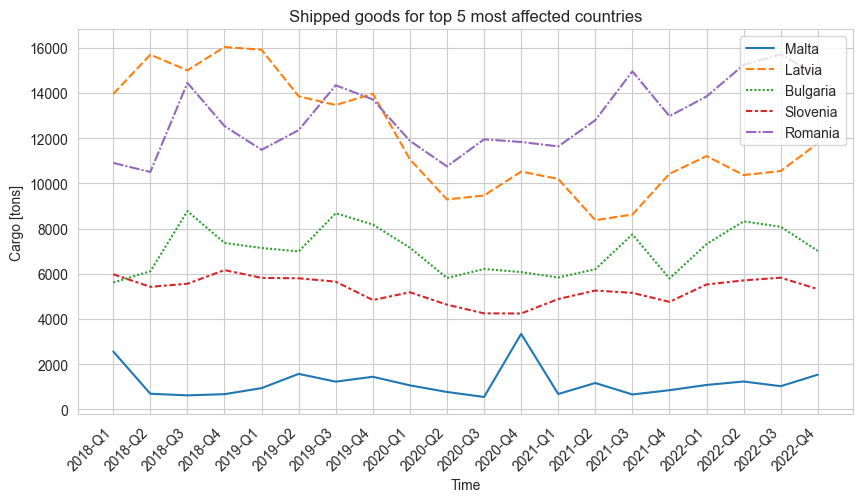

In [26]:
# Find the maximum for each country in 2019
max_2019 = df_cargo.loc["2019-Q1":"2019-Q4"].max()

# Find the maximum for each country for 2020
min_2020 = df_cargo.loc["2020-Q1":"2020-Q4"].min()

# Find the percentage change for each coutry between 2019-2020
change = (max_2019 - min_2020) / max_2019 * 100

# Short the countries by percentage change (desceding)
most_affected_countries = change.sort_values(ascending=False)

# Filter the data that are going to be ploted for the interval 2018-Q1 to 2022-Q4
filtered_data = df_cargo[most_affected_countries.head(5).index].loc["2018-Q1":"2022-Q4"]

#supress seaborn warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# Plot
plt.figure(figsize=(10, 5))
sb.lineplot(data=filtered_data)
plt.xlabel("Time")
plt.ylabel("Cargo [tons]")
plt.title("Shipped goods for top 5 most affected countries")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="upper right")
plt.show()

As depicted in the graph, the volume of shipped cargo for each country exhibits moderate fluctuations over time. However, the impact of COVID-19 is evident in the simultaneous decline in maritime trade. The graph reveals a steady decline for each country that initiated around Q4 2019 and Q1 2020. Notably, every country reached a low almost simultaneously in Q2 and Q3 of 2020. Finally, most countries have managed to recover from the effects of the pandemic, with their trade activities returning to normal (pre-COVID-19) levels by the end of 2022.

**Chronological representation of the changes in the transportation of goods - top 5 trading countries** <br> 

The same analysis can be conducted for the top 5 leading countries in terms of the gross weight of goods. To rank these countries based on their shipping dominance, we considered the highest value of goods transported during the four quarters of 2019. This approach allows for a more reliable conclusion to be drawn regarding the pattern of sea-transported goods before, during and after COVID-19 pandemic.

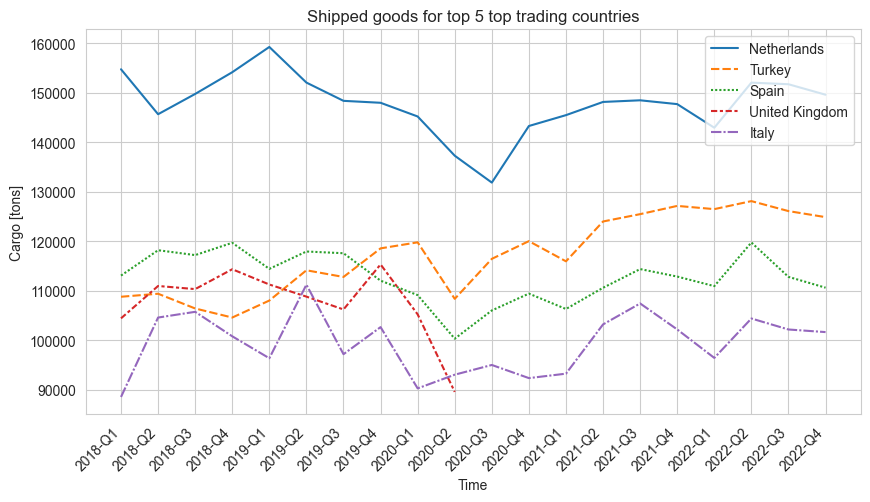

In [24]:
# Short the countries by amount of transported goods 
leading_countries = max_2019.sort_values(ascending=False)

# Filter the data that are going to be ploted for the interval 2018-Q1 to 2022-Q4
filtered_data = df_cargo[leading_countries.head(5).index].loc["2018-Q1":"2022-Q4"]

# Plot
plt.figure(figsize=(10, 5))
sb.lineplot(data=filtered_data)
plt.xlabel("Time")
plt.ylabel("Cargo [tons]")
plt.title("Shipped goods for top 5 top trading countries")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="upper right")
plt.show()

Similar to the previous graph, yearly fluctuations are noticeable for each country. What is evident is the sudden decrease in sea trading activity for each country, with a minimum point occurring around the middle of the year 2020. All of the countries seem to have overcome the disruptions to their trading activity, as by the end of 2022, they are either slightly lower or at the same levels as before the COVID-19 pandemic. It's worth noting that Turkey does not appear to have been heavily influenced by the COVID-19 pandemic, as there is a steady increase over the studied period. Additionally, it should be mentioned that the United Kingdom seems to have been significantly affected after Q4 of 2019. However, it's important to acknowledge that the dataset only included data up to Q2 of 2020 for UK, which is why this specific line extends only until that point.

**Choropleth map displaying the impact on the imports/exports of goods in EEA** 

In this section, an attempt is made to visualize the impact of COVID-19 on the shipping activity of all countries with available data on an actual map of Europe. This approach allows us to draw conclusions regarding the geographical position and response of each country to the pandemic.

First, a shapefile (.shp) containing geometric data of Europe is uploaded to the remote repository, and then it is read.

In [10]:
file_path = os.path.abspath("") + "\\european_map.shp\\NUTS_RG_20M_2021_3035.shp"
europe = gpd.read_file(file_path)

Creation of the map:

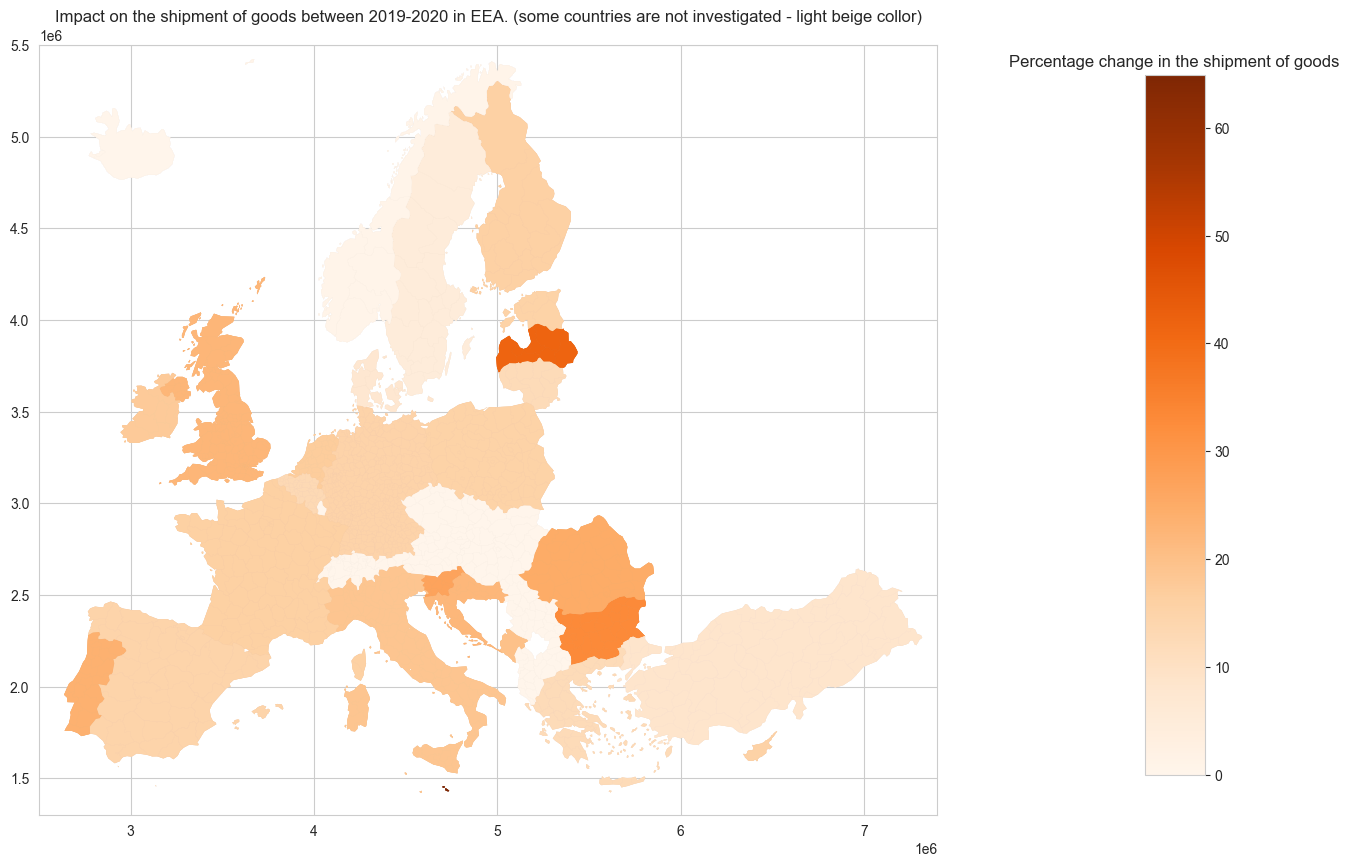

In [25]:
#Make a dictionary with countries as keys and their % change as values
countries_with_effect = change.to_dict()

# create a new dictionary with 2-letter codes as keys 
countries_with_effect_alpha2 = {}
for country_name, value in countries_with_effect.items():
    if country_name == "Greece":
            countries_with_effect_alpha2["EL"] = value # shp file has EL instead of GR
    elif country_name == "United Kingdom":
            countries_with_effect_alpha2["UK"] = value # shp file has UK instead of GB
    else:
        country = pc.countries.get(name = country_name)
        if country:
            countries_with_effect_alpha2[country.alpha_2] = value

# All european countries in GeoDataFrame as keys in a dictionary with 0 values
countries_final = {key: 0 for key in europe['CNTR_CODE'].unique()}

# Merge the two dictionaries, giving priority to the first one
merged_dict_of_countries = {**countries_final, **countries_with_effect_alpha2}

# Create a new column named "PercentageChange" in the europe20 GeoDataFrame
europe["PercentageChange"] = europe["CNTR_CODE"].map(merged_dict_of_countries)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.set_xlim(0.25e7, 0.74e7)
ax.set_ylim(0.13e7, 0.55e7)
ax.set_title("Impact on the shipment of goods between 2019-2020 in EEA. (some countries are not investigated - light beige collor)")
europe.plot(column="PercentageChange", cmap='Oranges', linewidth=0.01, ax=ax, edgecolor='0.8', legend=True, cax=ax.get_figure().add_axes([0.95, 0.15, 0.04, 0.7]))
ax.get_figure().get_axes()[1].set_title("Percentage change in the shipment of goods")
plt.show()

It should be noted that there is no available data for some countries, such as Iceland. Additionally, this analysis is, of course, irrelevant for certain countries within the EEA that do not have sea borders, such as Slovakia and Hungary. Therefore, these countries are represented with a light beige color on the map.

As observed from the map, sea trading in northwestern Europe (United Kingdom and Ireland) appears to be more affected when compared to southeastern Europe (Greece and Turkey). Western European countries, including Italy, the Netherlands, Belgium, Germany, France, and Spain, experienced a moderate average decrease of 15%. Portugal, however, saw a decrease of over 20%, while Malta was the most affected with a significant 65% decrease in sea trading. Eastern Europe was also notably affected, with decreases in sea trading in countries like Romania, Bulgaria, and Latvia reaching 25%, 35%, and 40%, respectively.

**General Conclusion of the first section**

As expected, a general conclusion is that COVID-19 had a noticeable impact on the shipment of goods for all the investigated countries within the EEA. Each country's shipping activity began to steadily decrease towards the end of 2019, reaching a local minimum around 2020. The recovery period after the pandemic varied from country to country. Furthermore, it can be said that the most affected countries were typically smaller nations or those with less extensive shipping activity. In contrast, the top shipping countries also experienced a decrease, but it did not exceed an average of 25%. Most of the countries had returned to their pre-pandemic levels of sea trading around 2022. The most affected geographical regions appeared to be eastern and northwestern Europe, while Western Europe's sea trading activity seemed to be less affected.

# 2. Analysis of the pattern of passenger transportation behaviors in EEA
This section focuses on the analysis of the pattern of passenger behaviors in European Economic Exclusive Area during the period 2018-2022. For this purpose the following steps are taken.

WRITE A PARAGRAPH ON WHAT'S THE FOCUS OF THE SECTION


WRITE HOW THE DATA HAS BEEN PROCESSED

WRITE HERE WHAT CAN BE DEDUCTED FROM THE GRAPH (COULD ALSO GO AFTER THE FIGURE)

In [4]:
# Comparative graph of patterns for the three different transport modes (EU)

WRITE HERE WHAT CAN BE DEDUCTED FROM THE GRAPH (COULD ALSO GO AFTER THE FIGURE)

In [5]:
# Normalization per transport mode for the highest quarter (Q) of 2019 

WRITE HERE WHAT CAN BE DEDUCTED FROM THE GRAPH (COULD ALSO GO AFTER THE FIGURE)

In [6]:
# Analysis of the countries with the highest variation in maritime transportation compared to the other two modes of transportation. In order to find the top 3 countries, we consider the absolute difference between maritime transport and the maximum of Air or Railway transport. This difference is based on the percentage change for maritime transport being the most different from the highest change in other modes of transport. For each of those countries, we produce a line graph comparing the highest change in maritime transport to other means of transport.

WRITE HERE THE CONCLUSIONS OVER THE PARAGRAPH AND RESULTS

# 3. Analysis of the impact on the maritime CO2 emissions
The main focus of this section is to define how the COVID-19 pandemic has affected specific categories of ships. This chapter will primarily examine the impact on various types of ships, both in relation to each other and concerning total CO2 emissions. The selected ship categories include Bulk Carriers, Passenger Ships, Container Ships, LNG Carriers, and Oil Tankers. Additionally, the total CO2 emissions also encompass other types of ships sailing in the European Economic Area (EEA) between 2018 and 2022.

The processed data are firstly imported.

In [13]:
co2 = pd.read_csv('DATA_PROCESSED/df_ship_co2.csv')
co2_tot = pd.read_csv('DATA_PROCESSED/df_ship_co2_total.csv')
co2_final = pd.read_csv('DATA_PROCESSED/df_ship_co2_final.csv')
time = pd.read_csv('DATA_PROCESSED/df_ship_time.csv')

## Line graph
Specifically, in the first graph, CO2 emissions in tons are plotted for each of the selected ship categories and compared to the total CO2 emissions of the maritime
industry. In the following graph the average CO2 emissions per ship per year are provided.

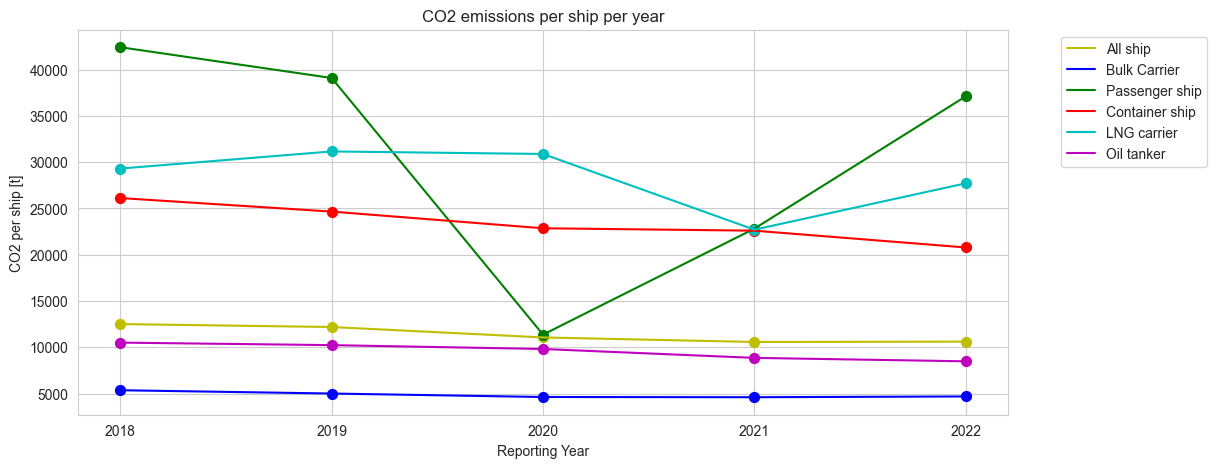

In [18]:
fig, ax = plt.subplots(figsize=(12, 5))
ship_types = {
    'All ship': ('CO2 per ship [t]', co2_tot),
    'Bulk Carrier': ('Bulk carrier', co2),
    'Passenger ship': ('Passenger ship', co2),
    'Container ship': ('Container ship', co2),
    'LNG carrier': ('LNG carrier', co2),
    'Oil tanker': ('Oil tanker', co2)
}

colors = ['y','b', 'g', 'r', 'c', 'm'] 
for i, (ship_type, (column_name, data_source)) in enumerate(ship_types.items()):
    data = data_source[data_source['Reporting Period'].isin(co2_tot['Reporting Period'])][column_name]
    color = colors[i % len(colors)]  # Cycle through the list of colors
    ax.plot(co2_tot['Reporting Period'], data, label=ship_type, color=color)
    ax.scatter(co2_tot['Reporting Period'], data, marker='o', s=50, color=color)


ax.set_title('CO2 emissions per ship per year')
ax.set_xlabel('Reporting Year')
ax.set_ylabel('CO2 per ship [t]')
plt.xticks([2018, 2019, 2020, 2021, 2022])
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

Several key insights can be derived from the plot above. Firstly, it is evident that there is an overall decreasing trend in CO2 emissions for most of the ship types, except for passenger vessels. This decrease can be attributed to advancements in technologies related to emission reduction. Furthermore, the impact of the pandemic on these ship types is not particularly notable, except for passenger vessels. In contrast, passenger vessels significantly reduced their CO2 emissions as soon as the coronavirus began to spread globally. This aligns with the trend of the cruise industry. However, starting from the next year, 2021, emissions dramatically increased again, reaching pre-pandemic levels by 2022. Therefore, for this sector, it is less clear how technological improvements have affected CO2 emissions.

Furthermore, some notes should be made regarding the overall CO2 emissions from ships. As displayed in the previous plot, it is evident that the overall ship emissions were not largely affected by the COVID-19 pandemic. Instead, a slightly decreasing trend is visible, which may not be linked to the pandemic's effects. Therefore, despite the passenger sector holding a significant position in the European maritime industry, it is apparent that its impact on CO2 emissions is not as significant as that of other ship categories.

What was mentioned above can also be verified by examining the average time spent at sea per ship in the European Economic Area (EEA). In the following graph, these data are provided with a specific focus on the considered ship category.

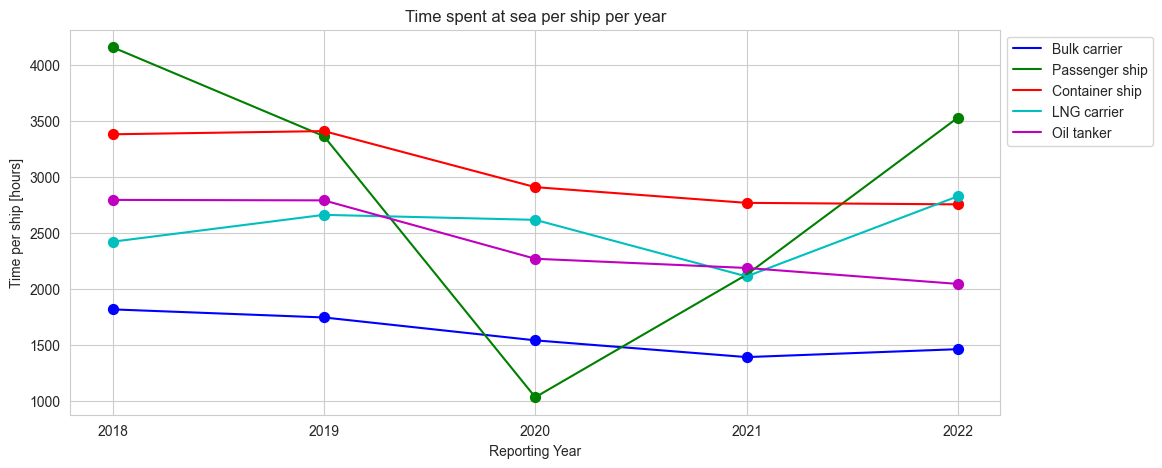

In [15]:
fig, ax = plt.subplots(figsize=(12, 5))

ship_types = ['Bulk carrier', 'Passenger ship', 'Container ship', 'LNG carrier', 'Oil tanker']
colors = ['b', 'g', 'r', 'c', 'm'] 

for ship_type, color in zip(ship_types, colors):
    data = time[ship_type]
    ax.plot(time['Reporting Period'], data, label=ship_type, color=color)
    ax.scatter(time['Reporting Period'], data, marker='o', s=50, color=color)


ax.set_title('Time spent at sea per ship per year')
ax.set_xlabel('Reporting Year')
ax.set_ylabel('Time per ship [hours]')
plt.xticks([2018, 2019, 2020, 2021, 2022])
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

As expected, the time spent at sea by passenger vessels rapidly decreased on average as the COVID-19 pandemic and lockdowns took place in Europe, especially in 2020. This decrease is proportional to what was already observed for CO2 emissions. Furthermore, the general trend related to CO2 emissions for each ship category is coherent and proportional to the average time spent at sea. It can be noticed that bulk carrier ships are the least productive in terms of CO2 emissions per ship due to their lower time spent at sea per ship. Similarly, this can be observed for oil tankers.

However, a notable difference can be concluded when comparing container ships and LNG carriers. Despite LNG carriers spending less time at sea on average, their CO2 production is higher than that of container ships. This leads to the conclusion that, in terms of CO2 emissions, container ships outperform LNG carriers.

In conclusion, comparing the time spent at sea with CO2 emissions reveals that CO2 emissions from ships not only depend on technological improvements but also on a decrease in the time spent at sea in the European exclusive area by each ship, on average. The only exceptions are passenger ships and LNG carriers: the former was affected by the pandemic's effects in 2020, while the latter faced a decline in 2021 and rapid growth in 2022, which can be attributed to increased global demand for these ships, as the pandemic's effects had already begun to subside in the passenger industry in 2021.

## Donut graphs

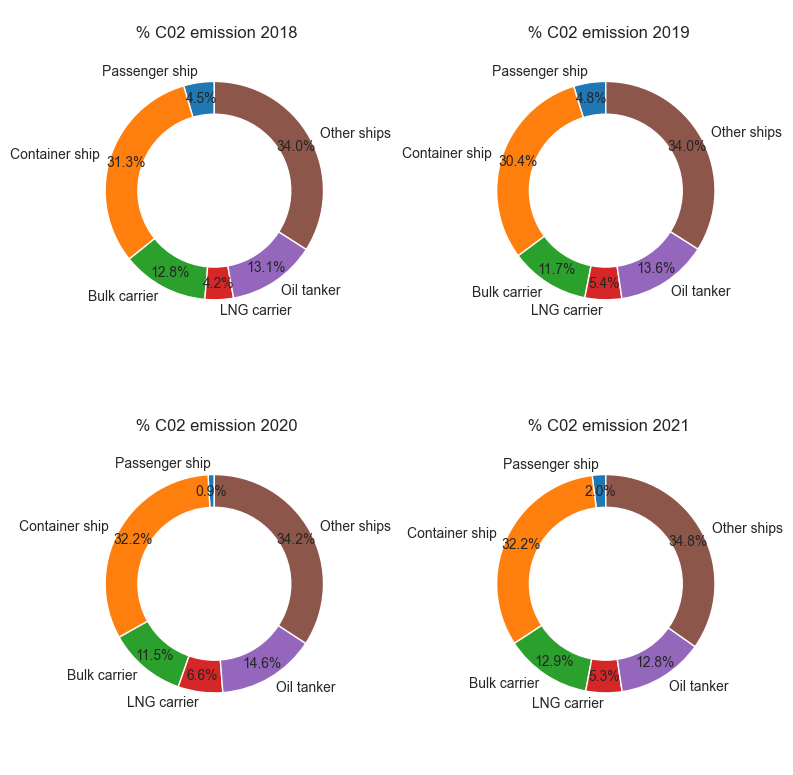

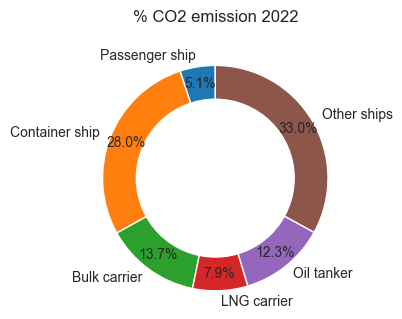

In [16]:
years_to_display = [2018, 2019, 2020, 2021]
fig, axes = plt.subplots(2, 2, figsize=(8, 8)) 

for i, year in enumerate(years_to_display[:4]):
    data = co2_final[co2_final['Reporting Period'] == year]
    labels = data.columns[2:]  # Labels for different ship type
    values = data.iloc[0, 2:]  # CO2 emissions values for each ship type

    row = i // 2
    col = i % 2

    ax = axes[row, col]  # Create a donut chart in the corresponding subplot
    ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

    center_circle = plt.Circle((0, 0), 0.70, fc='white') 
    
    ax.add_artist(center_circle)
    ax.axis('equal') 
    ax.set_title(f' % C02 emission {year}', fontsize=12, y=.90)

plt.tight_layout() 
plt.show()


# Data for the year 2022
data_2022 = co2_final[co2_final['Reporting Period'] == 2022]
labels = data_2022.columns[2:]
values = data_2022.iloc[0, 2:]

fig, ax = plt.subplots(figsize=(3.2, 3.2))
ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

center_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(center_circle) 
ax.axis('equal')
ax.set_title('% CO2 emission 2022', fontsize=12, y=1.1)

plt.show()


The five graphs above reported offer a comprehensive view over the contribution of each ship type on the total CO2 emissions throughout the years, from before Covid to after.

First of all, it is possible to notice how the five ship types chosen always cover around 70% of the global emissions, thus underlying their relevance in the case study. The remaining 30% is instead related to ships for which not enough data is available, or their influence due to the pandemic is not important for the kind of cargo transported or operations they are used for. 
About 80% of world's cargo is carried by sea. This justifies the approximately constant percentages through the years of the merchant vessels such as bulk carriers, container ships, LNG carriers and oil tankers. The first two always cover around 42% of the total donut chart with peak value in 2021, which can be accounted as Covid period. Furthermore, in 2022 to the lowest container ships percentage corresponds also the maximum for bulk carriers. This behaviour may be implied to a late response of the containers market to Covid. 

The market seems to remain steady for oil tankers, which shows how the demand for oil was not influenced by Covid. This may implied to that part of the market which exploits oil derivatives for heating of houses and factories. On the other hand, LNG carriers cover a more importance slice of the chart in 2022 with respect to all previous years. 
As it can be expected, passenger ships score their lowest value in 2020, with increasingly higher percentages in the following years. This aligns with the population's desire to travel again after the quarantine period.

# 4. Analysis of the difference between CO2 emissions in maritime transport and broader emission trends in EEA
This section investigates the impact on the overall CO2 emissions of maritime transport in comparison to the broader trends in CO2 emissions across the European Economic Area (EEA). The first dataset provided for the comparison of the broader emission trends in the EEA is exported from the Emissions Database for Global Atmospheric Research (EDGAR) of the European Commission. This statistical dataset consists of the atmospheric emissions produced by the member countries of the European Union. For our specific trend, only CO2 emissions are necessary.

This dataset consists of emissions from different countries/regions and, in the latter part of the report, the total emissions from various sectors of industries that produce emissions. 

These sectors include:
   - Agriculture
   - Buildings
   - Shipping
   - Fuel Exploitation
   - Power Industry
   - Transport
   - Processes
   - Waste

Since the goal of this graph is to compare the variation in the behavior of emission trends for the entire industry with the emissions of the maritime transport sector, the emissions from each sector in the EDGAR dataset are summarized per year. This summation is then normalized with respect to the maximum emission value, which was 3113 Mt CO2/year in the year 2017. This value serves as the benchmark for the maximum emissions. Therefore, we expect to see a downward trend in emissions production, and we will closely examine the influence of the COVID-19 pandemic on the emission trend.

In the graph, a second dataset representing the emission trend of the maritime sector is plotted. It should be noted that this dataset has been processed and introduced in the previous chapter of the report. For this specific graph, the total emissions from all ship type categories are summed and then normalized with respect to the maximum value in the EDGAR dataset. As a result, we expect the values to be around the 4% mark, which essentially represents the emission contribution of the maritime sector in the global emissions trend.


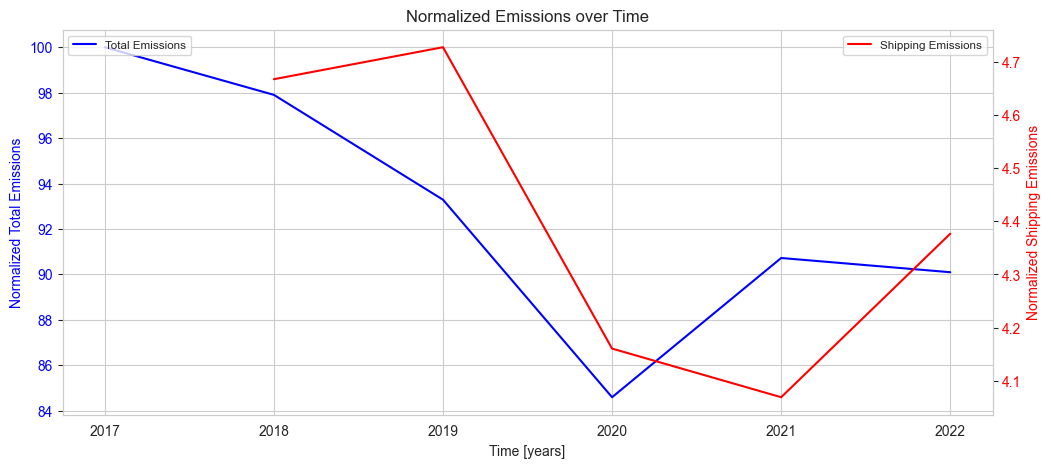

In [19]:
# Total Emissions
file_path_emissions = os.path.abspath("") + "\\DATA_PROCESSED\\df_emissions.csv"
df_emissions = pd.read_csv(file_path_emissions)
df_emissions = df_emissions.rename(columns={df_emissions.columns[0]: "Years"})

# Ship dataset
file_path_ships = os.path.abspath("") + "\\DATA_PROCESSED\\df_ship_co2_total.csv"
co2_tot = pd.read_csv(file_path_ships)
co2_tot_normalized = (co2_tot[co2_tot.columns[2]] / df_emissions[df_emissions.columns[1]].max() * 100)

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plot Total Emissions
ax1.plot(df_emissions["Years"], df_emissions[df_emissions.columns[2]], color='b', label="Total Emissions")
ax1.set_xlabel("Time [years]")
ax1.set_ylabel("Normalized Total Emissions", color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

# Plot Shipping Emissions
ax2.plot(co2_tot["Reporting Period"], co2_tot_normalized, color='r', label="Shipping Emissions")
ax2.set_ylabel("Normalized Shipping Emissions", color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title("Normalized Emissions over Time")

ax1.legend(loc='upper left', fontsize='small', labels=["Total Emissions"])
ax2.legend(loc='upper right', fontsize='small', labels=["Shipping Emissions"])

plt.grid()
plt.show()

It should be noted that the graph starts from the year 2017, which serves as the benchmark and represents the maximum CO2 emissions for the creation of the graph. The graph is divided into two parts, with two different y-axis values: the left side represents the normalized data for the total emissions, and the right side represents the normalized emissions of the maritime sector.

The assumption that CO2 emissions would be close to approximately 3% - 4% seems to be validated. The trend for total emissions appears to follow a downward slope from the years 2017 to 2020, with the lowest amount of emissions occurring in 2020. This reduction is correlated with the beginning of restrictive measures implemented to address the COVID-19 pandemic, which temporarily shut down numerous industries. The COVID-19 pandemic played a significant role in the reduction of emissions. It should be noted that the goal to reduce emissions from all industry sectors by 2050 leads to the forecasted stabilization of the emission trend at around 90% of the previous maximum observed in 2017. The higher emission trend in 2021 is acceptable because industries restarted with fewer restrictions, leading to higher emission production.

The trend in total CO2 emissions for the shipping industry is largely similar, with one notable exception: the most significant decrease in emissions becomes apparent in the year 2021. This can be attributed to the combined effects of the COVID-19 pandemic and the implementation of stricter regulations aimed at reducing emissions within the maritime sector. These regulations include the EU's Emissions Trading System (EU ETS) and the emission reduction goals set by the International Maritime Organization (IMO) to be achieved by 2025. Although the pandemic had minimal impact on CO2 emissions in the shipping sector, it is important to recognize that this trend is consistent with the EU's current emission reduction policies and rules, which are based on the Paris Agreement. Although it was only temporary, the pandemic did contribute to a decrease in emissions, which supported ship owners' ongoing efforts to reduce emissions. It is anticipated that both sets of data will continue to show a decreasing trend, primarily driven by the EU's sustainability goals, which must be met in the pursuit of more environmentally responsible practices in the shipping industry. This trend reflects the collective efforts within the industry to align with these objectives and reduce its carbon footprint over time.

The aforementioned data highlights the industry's commitment to sustainability and demonstrates the continuous efforts to shift towards more ecologically conscious practices. It emphasizes how crucial regulations are to securing a more sustainable future for the maritime industry and the broader emission producing sectors.

# 5. Conclusions



# 6. Contribution Statement

**Nicola Bovo**: Background research & visualisation & Question 3 & Introduction

**Zacharias Zervos**: Background research & conceptualisation & Question 4

**Vaseileios Sideris**: Data analysis & Data modelling & Question 1 

**Piotr Pietrzak**: Data analysis & Data modelling & Question 2

**Davide Centorrino**: Data analysis & visualisation & Question 3 & Conclusion

# 7. Data Used

**Paragraph 1**:
    - Gross weight of goods transported: https://ec.europa.eu/eurostat/databrowser/bookmark/662cc15a-0555-4b7f-87c8-e48013aea8c0?lang=en

**Paragraph 2**:
    - Maritime Transport: https://ec.europa.eu/eurostat/databrowser/bookmark/0d511ae5-24c1-4009-8c27-4992f3d7c652?lang=en
    - Air Transport: https://ec.europa.eu/eurostat/databrowser/bookmark/e274c95c-b4af-4704-8630-9c7560979af0?lang=en
    - Railway Transport :https://ec.europa.eu/eurostat/databrowser/bookmark/e8751a3b-5536-47f1-a543-672db0bc4528?lang=en 
    
**Paragraph 3**:
    - CO2 emissions from maritime transport: https://data.europa.eu/data/datasets/co2-emissions-data?locale=en

**Paragraph 4**:
    - CO2 emissions data from maritime transport: https://data.europa.eu/data/datasets/co2-emissions-data?locale=en
    - Overall emissions: https://edgar.jrc.ec.europa.eu/emissions_reports       

STILL TO BE SORTED    
EDGAR - Emissions Database for Global Atmospheric Research: https://edgar.jrc.ec.europa.eu/emissions_reports 
Sea transport of goods: https://ec.europa.eu/eurostat/databrowser/view/TTR00009/default/table?lang=en
Passenger embarked and disembarked in all ports: https://ec.europ.eu/eurostat/databrowser/view/mar_mp_aa_cph/default/table?lang=en